In [1]:
import numpy as np 
import pandas as pd 

import collections

In [2]:
!wget  https://www.dropbox.com/s/5721wcs2guuykzl/stacksample.zip?dl=0

--2025-05-21 07:45:32--  https://www.dropbox.com/s/5721wcs2guuykzl/stacksample.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/bnabda9cee2yuyi6wesmv/stacksample.zip?rlkey=sucdc1cm2m7fnwtzhykv24g8z&dl=0 [following]
--2025-05-21 07:45:33--  https://www.dropbox.com/scl/fi/bnabda9cee2yuyi6wesmv/stacksample.zip?rlkey=sucdc1cm2m7fnwtzhykv24g8z&dl=0
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uced429915e0f775f2ce6374db16.dl.dropboxusercontent.com/cd/0/inline/CqHVMPQcVVwi130YZvGZ-w-MeMW9qjsLJaMFpqN6RRCT-6pffLVQNfrTingAzEyErGlGq-BZz2s54kzsxjwCm-zugzAijPoZ0D4RjhQdyIx0Q-Jti0DP1PZvtGf-jYVwM7o/file# [following]
--2025-05-21 07:45:33--  https://uced429915e0f775f2ce6374db16.dl.dropboxusercontent.com/cd/0/in

In [3]:
!unzip "stacksample.zip?dl=0"

Archive:  stacksample.zip?dl=0
  inflating: Answers.csv             
  inflating: Questions.csv           
  inflating: Tags.csv                


In [4]:
ques=pd.read_csv('Questions.csv', encoding='ISO-8859-1')
ques.head(10)

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...
5,330,63.0,2008-08-02T02:51:36Z,NaN,29,Should I use nested classes in this case?,<p>I am working on a collection of classes use...
6,470,71.0,2008-08-02T15:11:47Z,2016-03-26T05:23:29Z,13,Homegrown consumption of web services,<p>I've been writing a few web services for a ...
7,580,91.0,2008-08-02T23:30:59Z,NaN,21,Deploying SQL Server Databases from Test to Live,<p>I wonder how you guys manage deployment of ...
8,650,143.0,2008-08-03T11:12:52Z,NaN,79,Automatically update version number,<p>I would like the version property of my app...
9,810,233.0,2008-08-03T20:35:01Z,NaN,9,Visual Studio Setup Project - Per User Registr...,<p>I'm trying to maintain a Setup Project in <...


In [5]:
ques.drop(["OwnerUserId","CreationDate","ClosedDate","Score"], axis=1, inplace=True)
ques.head(10)

,Id,Title,Body
0,80,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...
5,330,Should I use nested classes in this case?,<p>I am working on a collection of classes use...
6,470,Homegrown consumption of web services,<p>I've been writing a few web services for a ...
7,580,Deploying SQL Server Databases from Test to Live,<p>I wonder how you guys manage deployment of ...
8,650,Automatically update version number,<p>I would like the version property of my app...
9,810,Visual Studio Setup Project - Per User Registr...,<p>I'm trying to maintain a Setup Project in <...


In [6]:
import re

def rem_html_tags(body):
    regex = re.compile('<.*?>')
    return re.sub(regex, '', body)

In [7]:
ques['Body'] = ques['Body'].apply(rem_html_tags)
ques.head(10)

,Id,Title,Body
0,80,SQLStatement.execute() - multiple queries in o...,I've written a database generation script in S...
1,90,Good branching and merging tutorials for Torto...,Are there any really good tutorials explaining...
2,120,ASP.NET Site Maps,Has anyone got experience creating SQL-based A...
3,180,Function for creating color wheels,This is something I've pseudo-solved many time...
4,260,Adding scripting functionality to .NET applica...,I have a little game written in C#. It uses a ...
5,330,Should I use nested classes in this case?,I am working on a collection of classes used f...
6,470,Homegrown consumption of web services,I've been writing a few web services for a .ne...
7,580,Deploying SQL Server Databases from Test to Live,I wonder how you guys manage deployment of a d...
8,650,Automatically update version number,I would like the version property of my applic...
9,810,Visual Studio Setup Project - Per User Registr...,I'm trying to maintain a Setup Project in Visu...


In [8]:
ques.to_csv('Question_clean.csv',index=False)

In [9]:
# Plotting Libs
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# magic function
%matplotlib inline

In [10]:
tags=pd.read_csv('Tags.csv', encoding='ISO-8859-1')
tags.head(10)

,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn
5,90,branch
6,90,branching-and-merging
7,120,sql
8,120,asp.net
9,120,sitemap


In [11]:
def plot_tags(tagCount):

    x,y = zip(*tagCount)

    colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired
    colors = [colormap(i) for i in np.linspace(0, 0.8,50)]

    area = [i/4000 for i in list(y)]   # 0 to 15 point radiuses
    plt.figure(figsize=(9,8))
    plt.ylabel("Number of question associations")
    for i in range(len(y)):
        plt.plot(i,y[i], marker='o', linestyle='',ms=area[i],label=x[i])

    plt.legend(numpoints=1)
    plt.show()

[('javascript', 124155), ('java', 115212), ('c#', 101186), ('php', 98808), ('android', 90659), ('jquery', 78542), ('python', 64601), ('html', 58976), ('c++', 47591), ('ios', 47009)]


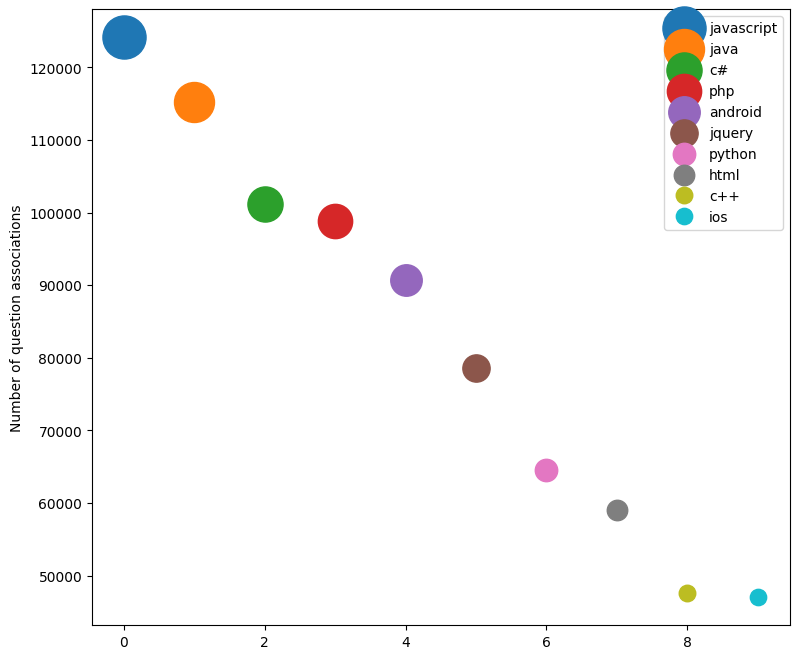

In [12]:
tagCount =  collections.Counter(list(tags['Tag'])).most_common(10)
print(tagCount)
plot_tags(tagCount)

In [13]:
top10=['javascript','java','c#','php','android','jquery','python','html','c++','ios']

In [14]:
tag_top10= tags[tags.Tag.isin(top10)]
print (tag_top10.shape)
tag_top10.head(10)

(826739, 2)


,Id,Tag
14,260,c#
18,330,c++
28,650,c#
35,930,c#
39,1010,c#
41,1040,c#
61,1760,c#
74,2250,c#
79,2530,html
97,2780,c#


In [15]:
tag_top10['Id'].value_counts().head(10)

Id
4009250     5
30798790    5
30289880    5
23484760    5
35318730    5
23267320    5
30991580    5
31085960    5
35283570    5
11648170    5
Name: count, dtype: int64

In [16]:
tag_top10.head(10)

,Id,Tag
14,260,c#
18,330,c++
28,650,c#
35,930,c#
39,1010,c#
41,1040,c#
61,1760,c#
74,2250,c#
79,2530,html
97,2780,c#


In [17]:
def add_tags(question_id):
    return tag_top10[tag_top10['Id'] == question_id['Id']].Tag.values

top10 = tag_top10.apply(add_tags, axis=1)

In [18]:
len(top10),tag_top10.shape

(826739, (826739, 2))

In [19]:
tag_top10=pd.concat([tag_top10, top10.rename('Tags')], axis=1)
tag_top10.head(10)

,Id,Tag,Tags
14,260,c#,[c#]
18,330,c++,[c++]
28,650,c#,[c#]
35,930,c#,[c#]
39,1010,c#,[c#]
41,1040,c#,[c#]
61,1760,c#,[c#]
74,2250,c#,[c#]
79,2530,html,[html]
97,2780,c#,[c#]


In [20]:
tag_top10.drop(["Tag"], axis=1, inplace=True)
tag_top10.shape

(826739, 2)

In [21]:
top10_tags=tag_top10.loc[tag_top10.astype(str).drop_duplicates().index]

In [22]:
ques = pd.read_csv('Question_clean.csv', encoding='iso-8859-1')
ques.head(10)

,Id,Title,Body
0,80,SQLStatement.execute() - multiple queries in o...,I've written a database generation script in S...
1,90,Good branching and merging tutorials for Torto...,Are there any really good tutorials explaining...
2,120,ASP.NET Site Maps,Has anyone got experience creating SQL-based A...
3,180,Function for creating color wheels,This is something I've pseudo-solved many time...
4,260,Adding scripting functionality to .NET applica...,I have a little game written in C#. It uses a ...
5,330,Should I use nested classes in this case?,I am working on a collection of classes used f...
6,470,Homegrown consumption of web services,I've been writing a few web services for a .ne...
7,580,Deploying SQL Server Databases from Test to Live,I wonder how you guys manage deployment of a d...
8,650,Automatically update version number,I would like the version property of my applic...
9,810,Visual Studio Setup Project - Per User Registr...,I'm trying to maintain a Setup Project in Visu...


In [23]:
total=pd.merge(ques, top10_tags, on='Id')
print(total.shape)
total.head(10)

(706336, 4)


,Id,Title,Body,Tags
0,260,Adding scripting functionality to .NET applica...,I have a little game written in C#. It uses a ...,[c#]
1,330,Should I use nested classes in this case?,I am working on a collection of classes used f...,[c++]
2,650,Automatically update version number,I would like the version property of my applic...,[c#]
3,930,How do I connect to a database and loop over a...,What's the simplest way to connect and query a...,[c#]
4,1010,"How to get the value of built, encoded ViewState?",I need to grab the base64-encoded representati...,[c#]
5,1040,How do I delete a file which is locked by anot...,I'm looking for a way to delete a file which i...,[c#]
6,1760,.NET Unit Testing packages?,Getting back into a bit more .NET after a few-...,[c#]
7,2250,Datatable vs Dataset,I currently use a DataTable to get results fro...,[c#]
8,2530,How do you disable browser Autocomplete on web...,How do you disable autocomplete in the major b...,[html]
9,2780,Converting ARBG to RGB with alpha blending,Let's say that we have an ARGB color:\n\nColor...,[c#]


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from nltk import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, BatchNormalization, GRU ,concatenate
from keras.models import Model

In [25]:
import tensorflow as tf
tf.keras.backend.clear_session()

In [26]:
multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(total.Tags)
labels = multilabel_binarizer.classes_
labels

array(['android', 'c#', 'c++', 'html', 'ios', 'java', 'javascript',
       'jquery', 'php', 'python'], dtype=object)

In [27]:
train,test=train_test_split(total[:550000],test_size=0.25,random_state=24)

In [28]:
train.shape,test.shape

((412500, 4), (137500, 4))

In [29]:
X_train_t=train['Title']
X_train_b=train['Body']
y_train=multilabel_binarizer.transform(train['Tags'])
X_test_t=test['Title']
X_test_b=test['Body']
y_test=multilabel_binarizer.transform(test['Tags'])

In [30]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [31]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Step 1: Define Vocabulary Size
vocab_size_t = 20000  
vocab_size_b = 20000

# Step 2: Initialize Tokenizer with num_words and oov_token
tok_t = Tokenizer(num_words=vocab_size_t, char_level=False, split=' ', oov_token=1)  
tok_b = Tokenizer(num_words=vocab_size_b, char_level=False, split=' ', oov_token=1)

# Step 3: Fit Tokenizer on Training Texts
tok_t.fit_on_texts(X_train_t)
tok_b.fit_on_texts(X_train_b)

# Step 4: Convert Text to Sequences
sequences_train_t = tok_t.texts_to_sequences(X_train_t)
sequences_train_b = tok_b.texts_to_sequences(X_train_b)

# Step 5: Ensure Sequences Contain Only Valid Indices
# Convert any token > vocab_size to OOV token (index 1)
sequences_train_t = [[word if word < vocab_size_t else 1 for word in seq] for seq in sequences_train_t]
sequences_train_b = [[word if word < vocab_size_b else 1 for word in seq] for seq in sequences_train_b]

# Step 6: Pad Sequences to Fixed Length
max_len_t = 18
max_len_b = 300
sequences_matrix_train_t = pad_sequences(sequences_train_t, maxlen=max_len_t, padding='post')
sequences_matrix_train_b = pad_sequences(sequences_train_b, maxlen=max_len_b, padding='post')

# Debugging Check
print(f"Max token index in title sequences: {np.max(sequences_matrix_train_t)} (should be < {vocab_size_t})")
print(f"Max token index in body sequences: {np.max(sequences_matrix_train_b)} (should be < {vocab_size_b})")


Max token index in title sequences: 19999 (should be < 20000)
Max token index in body sequences: 19999 (should be < 20000)


In [32]:
# Convert Test Data to Sequences
sequences_test_t = tok_t.texts_to_sequences(X_test_t)
sequences_test_b = tok_b.texts_to_sequences(X_test_b)

# Ensure Test Sequences Contain Only Valid Indices
sequences_test_t = [[word if word < vocab_size_t else 1 for word in seq] for seq in sequences_test_t]
sequences_test_b = [[word if word < vocab_size_b else 1 for word in seq] for seq in sequences_test_b]

# Pad Test Sequences
sequences_matrix_test_t = pad_sequences(sequences_test_t, maxlen=max_len_t, padding='post')
sequences_matrix_test_b = pad_sequences(sequences_test_b, maxlen=max_len_b, padding='post')

# Debugging Check
print(f"Max token index in test title sequences: {np.max(sequences_matrix_test_t)} (should be < {vocab_size_t})")
print(f"Max token index in test body sequences: {np.max(sequences_matrix_test_b)} (should be < {vocab_size_b})")

Max token index in test title sequences: 19999 (should be < 20000)
Max token index in test body sequences: 19999 (should be < 20000)


In [33]:
def RNN():
    # Title Only
    title_input = Input(name='title_input', shape=[max_len_t])
    title_Embed = Embedding(vocab_size_t, 100, input_length=max_len_t, mask_zero=True, name='title_Embed')(title_input)
    gru_out_t = GRU(128)(title_Embed)
    # Auxiliary output to tune GRU weights smoothly
    auxiliary_output = Dense(10, activation='sigmoid', name='aux_output')(gru_out_t)

    # Body Only
    body_input = Input(name='body_input', shape=[max_len_b])
    body_Embed = Embedding(vocab_size_b, 100, input_length=max_len_b, mask_zero=True, name='body_Embed')(body_input)
    gru_out_b = GRU(128)(body_Embed)

    # Combine GRU outputs
    com = concatenate([gru_out_t, gru_out_b])

    # Dense Layers
    dense1 = Dense(256, activation='relu')(com)
    dp1 = Dropout(0.5)(dense1)
    bn = BatchNormalization()(dp1)
    dense2 = Dense(64, activation='relu')(bn)

    main_output = Dense(10, activation='sigmoid', name='main_output')(dense2)

    model = Model(inputs=[title_input, body_input], outputs=[main_output, auxiliary_output])
    return model

In [34]:
# Compile the model
model = RNN()
model.compile(optimizer='adam',
              loss={'main_output': 'categorical_crossentropy', 'aux_output': 'categorical_crossentropy'},
              metrics={'main_output': ['accuracy'], 'aux_output': ['accuracy']})


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [35]:
# Train the model
results = model.fit(
    {'title_input': sequences_matrix_train_t, 'body_input': sequences_matrix_train_b},
    {'main_output': y_train, 'aux_output': y_train},
    validation_data=(
        {'title_input': sequences_matrix_test_t, 'body_input': sequences_matrix_test_b},
        {'main_output': y_test, 'aux_output': y_test}
    ),
    epochs=5,
    batch_size=32
)

Epoch 1/5
12891/12891 ━━━━━━━━━━━━━━━━━━━━ 3942s 305ms/step - aux_output_accuracy: 0.2373 - aux_output_loss: 3.1388 - loss: 234.7509 - main_output_accuracy: 0.1738 - main_output_loss: 231.6126 - val_aux_output_accuracy: 0.3673 - val_aux_output_loss: 5.0005 - val_loss: 1998.1829 - val_main_output_accuracy: 0.0503 - val_main_output_loss: 1993.1838
Epoch 2/5
12891/12891 ━━━━━━━━━━━━━━━━━━━━ 4019s 312ms/step - aux_output_accuracy: 0.3772 - aux_output_loss: 5.8022 - loss: 2582.1318 - main_output_accuracy: 0.1444 - main_output_loss: 2576.3291 - val_aux_output_accuracy: 0.4002 - val_aux_output_loss: 9.2465 - val_loss: 6932.1602 - val_main_output_accuracy: 0.0505 - val_main_output_loss: 6922.9233
Epoch 3/5
12891/12891 ━━━━━━━━━━━━━━━━━━━━ 4052s 314ms/step - aux_output_accuracy: 0.3897 - aux_output_loss: 9.0830 - loss: 7047.3359 - main_output_accuracy: 0.1395 - main_output_loss: 7038.2476 - val_aux_output_accuracy: 0.4164 - val_aux_output_loss: 9.9304 - val_loss: 10339.2305 - val_main_output_ac

In [37]:
(predicted_main, predicted_aux)=model.predict({'title_input': sequences_matrix_test_t, 'body_input': sequences_matrix_test_b},verbose=1)

4297/4297 ━━━━━━━━━━━━━━━━━━━━ 348s 81ms/step


In [38]:
from sklearn.metrics import classification_report,f1_score

In [39]:
print(f1_score(y_test,predicted_main>.55,average='samples'))

0.20646133502860778
